In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

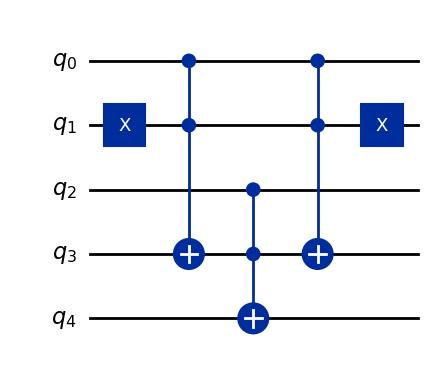

In [2]:
n= 5
qc = QuantumCircuit(n)
qc.x(1)
qc.ccx(0,1,3)
qc.ccx(2,3,4)
qc.ccx(0,1,3)
qc.x(1)
qc.draw("mpl")

In [3]:
def phase_oracle(n,name = 'uf'):
    qc = QuantumCircuit(n)
    qc.x(1)
    qc.ccx(0,1,3)
    qc.ccx(2,3,4)
    qc.ccx(0,1,3)
    qc.x(1)
    return qc

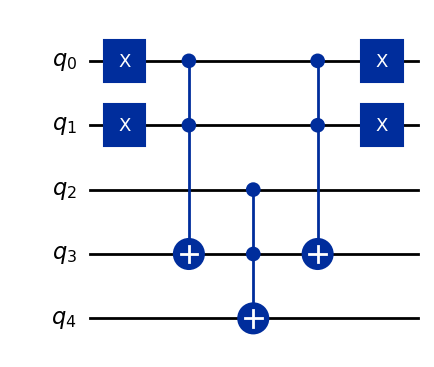

In [4]:
n=5
qc = QuantumCircuit(n)
for i in range(n-3):
    qc.x(i)
qc.ccx(0,1,3)
qc.ccx(2,3,4)
qc.ccx(0,1,3)
for i in range(n-3):
    qc.x(i)
qc.draw('mpl')

In [5]:
def diffuser(n, name='V'):
    qc = QuantumCircuit(n, name=name)

    for qb in range(n-2): #first layer of Hadamards in diffuser
        qc.h(qb)

    for i in range(n-2):
        qc.x(i)
    qc.ccx(0,1,3)
    qc.ccx(2,3,4)
    qc.ccx(0,1,3)
    for i in range(n-2):
        qc.x(i)
    for qb in range(n-2): #second Layer of Hadamrds in diffuser
        qc.h(qb)

    return qc
        

r =  2


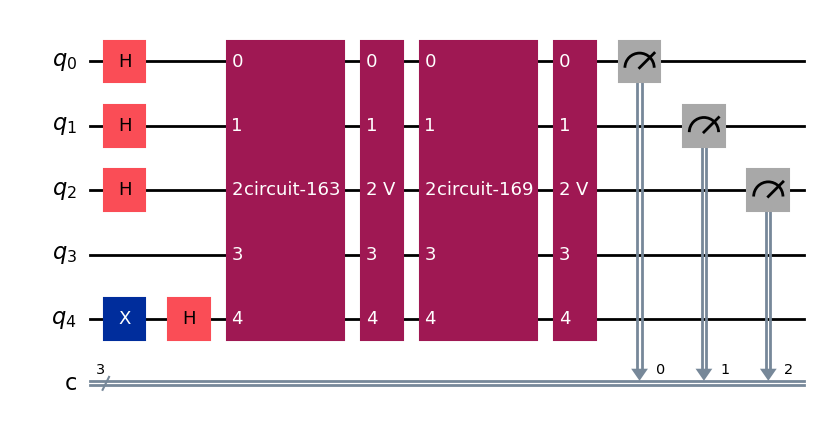

In [6]:
n=5
gr = QuantumCircuit(n, n-2)
mu=1 #number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**(n-2)/mu))) #determine r
print('r = ' ,r)

gr.h(range(n-2)) #step 1: apply hadamard gates on all working qubits

# put ancilla in state |->
gr.x(n-1)
gr.h(n-1)

#step 2: apply r rounds of the phase orale and the diffuser
for j in range(r):
    gr.append(phase_oracle(n), range(n))
    gr.append(diffuser(n), range(n))
    
gr.measure(range(n-2), range(n-2)) #step 3: measure all qubits
gr.draw('mpl')


In [7]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

In [8]:
from qiskit import transpile 
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram


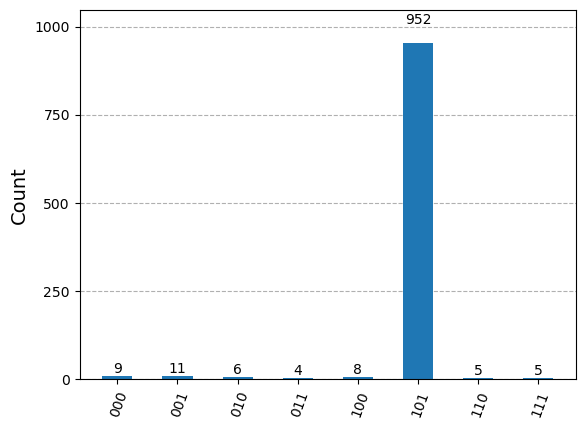

In [9]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(gr, backend), shots=1000)
result = job.result()
counts = result.get_counts(gr)
plot_histogram(counts)